### Imports

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt

import h5py #to read in h5 file 
import random #to shuffle indices

from numpy import pi
import os 
import time
from scipy import ndimage

os.chdir('/home/ishan/honors_thesis')
from scripts import dlc_rnn

np.random.seed(0) #seed for reproducability

Using TensorFlow backend.
/home/ishan/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ishan/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ishan/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ishan/anaconda3/lib/python3.7/site-packages/tensorflo

In [2]:
trainX = h5py.File('/home/ishan/honors_thesis/training_set/Xtrain.h5', 'r')['joint_angles'][:]
trainY = h5py.File('/home/ishan/honors_thesis/training_set/Ytrain.h5', 'r')['joint_angles'][:]

valX = h5py.File('/home/ishan/honors_thesis/training_set/Xval.h5', 'r')['joint_angles'][:]
valY = h5py.File('/home/ishan/honors_thesis/training_set/Yval.h5', 'r')['joint_angles'][:]

In [24]:
%%time
%matplotlib agg

#model = dlc_rnn.LSTM1Dense1(trainX=trainX, trainY=trainY, valX=valX, valY=valY, gputouse=1, task='fly')
modelPath = '/home/ishan/honors_thesis/models/flyRNN_1l_bs=16.hdf5'
model = dlc_rnn.LSTM1Dense1(mpath=modelPath, gputouse=1, task='fly')
#model.train(epochs=300, batch_size = 16)

CPU times: user 6.86 s, sys: 404 ms, total: 7.26 s
Wall time: 1.16 s


In [26]:
model.trainX = trainX
model.trainY = trainY
model.valX = valX
model.valY = valY
model.train(epochs=10,batch_size=16)

Training: 100%|██████████| 10/10 [05:28<00:00, 32.85s/it]


In [ ]:
model.train(epochs=500,batch_size=16)

Training:  46%|████▌     | 229/500 [2:03:38<2:23:10, 31.70s/it]

In [7]:
os.rename("/home/ishan/honors_thesis/flyRNN.hdf5", "/home/ishan/honors_thesis/models/flyRNN_1l_bs=16.hdf5")
os.rename("/home/ishan/honors_thesis/flylosscurve.png", "/home/ishan/honors_thesis/models/flylosscurve_1l_bs=16.png")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


Training: 100%|██████████| 1000/1000 [11:24:10<00:00, 41.05s/it] 


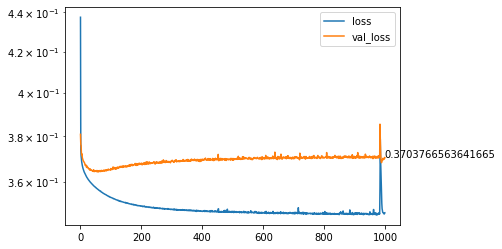

In [4]:
model_2layer = dlc_rnn.LSTM2Dense1(trainX=trainX, trainY=trainY, valX=valX, valY=valY, gputouse=1, task='fly')
model_2layer.train(epochs=1000, batch_size = 16)

In [5]:
os.rename("/home/ishan/honors_thesis/fly_2layersRNN.hdf5", "/home/ishan/honors_thesis/models/flyRNN_2l_bs=16.hdf5")
os.rename("/home/ishan/honors_thesis/fly_2layerslosscurve.png", "/home/ishan/honors_thesis/models/flylosscurve_2l_bs=16.png")